In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
dataset_dir_name = r"C:\Users\Baryan\Desktop\dataset"

# Get the current directory of the Python script
current_directory = os.getcwd()

# Construct the full path to the CSV file
DATADIR = os.path.join(current_directory, dataset_dir_name)

# List directories in DATADIR
CATEGORIES = [d for d in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, d))]
print(CATEGORIES)
IMG_SIZE = 100

['african_elephant', 'baboon', 'camel', 'horse', 'koala', 'opossum', 'sea_lion', 'sugar_glider', 'vicuna', 'yak']


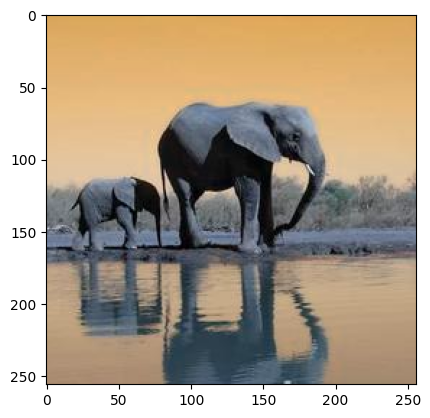

In [31]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [32]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()

In [33]:
print(len(training_data))

2938


In [34]:
lenofimage = len(training_data)

In [35]:
X = []
y = []

for image_array, label in training_data:
    X.append(image_array)
    y.append(label)
X = np.array(X).reshape(lenofimage, -1)

In [36]:
X.shape

(2938, 30000)

**flattening the array**

In [37]:
X[1]

array([40, 62, 98, ..., 12, 33, 65], dtype=uint8)

max-scaling


In [38]:
X = X / 255.0

Ex. of flattened array...

In [39]:
X[1]

array([0.15686275, 0.24313725, 0.38431373, ..., 0.04705882, 0.12941176,
       0.25490196])

note : y should be in array form compulsory.


In [40]:
y = np.array(y)

In [41]:
y.shape

(2938,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**KNN**

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [44]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.24319727891156462


In [45]:
print("Accuracy on unknown data is\n", classification_report(y_test, y_pred))

Accuracy on unknown data is
               precision    recall  f1-score   support

           0       0.21      0.60      0.31        65
           1       0.17      0.36      0.23        69
           2       0.68      0.34      0.45        56
           3       0.08      0.04      0.05        56
           4       0.25      0.04      0.07        70
           5       0.45      0.16      0.24        61
           6       0.38      0.19      0.25        58
           7       0.79      0.19      0.31        58
           8       0.19      0.46      0.27        46
           9       0.29      0.04      0.07        49

    accuracy                           0.24       588
   macro avg       0.35      0.24      0.22       588
weighted avg       0.35      0.24      0.22       588



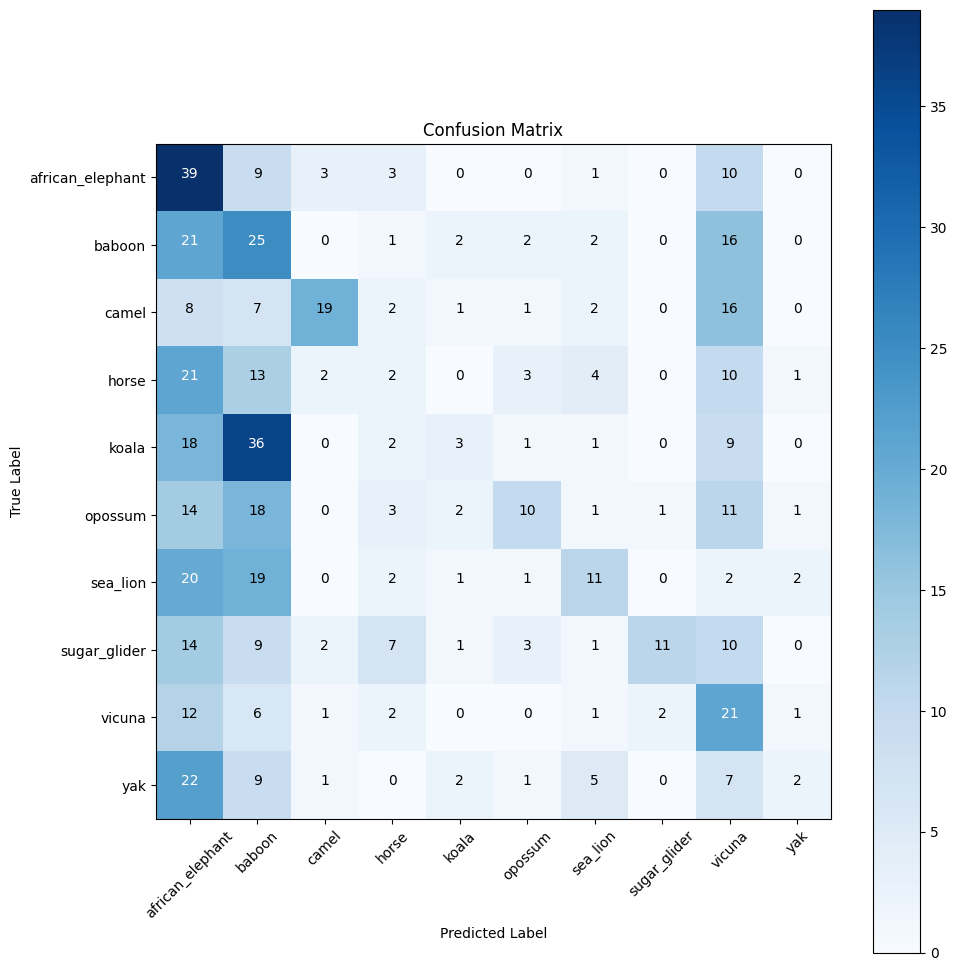

In [46]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

using extracted **features** instead of image array for the model

In [47]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
csv_file_name = "../features/haralick_features.csv"

# Get the current directory of the Python script
current_directory = os.getcwd()
# Construct the full path to the CSV file
csv_file_path = os.path.join(current_directory, csv_file_name)

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path, index_col=0)
# Assuming 'classlabel' is the column containing the class labels
X = data.drop("classlabel", axis=1)  # Extract features by dropping the label column
y = data["classlabel"]  # Extract labels
# Convert the data to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [48]:
data.head()

,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,haralick_8,haralick_9,haralick_10,haralick_11,haralick_12,haralick_13,classlabel
0,0.002428,222.585912,0.947941,2137.135593,0.444445,261.574069,8325.956462,8.066720,11.083405,0.000667,3.818080,-0.450997,0.999033,0
1,0.000301,435.141796,0.894704,2066.598204,0.140828,157.452525,7831.251019,8.201341,12.934858,0.000166,5.105606,-0.215022,0.976219,0
2,0.000236,644.605509,0.872428,2526.592667,0.132950,240.707834,9461.765161,8.450350,13.382888,0.000135,5.421029,-0.212577,0.978347,0
3,0.000145,468.903820,0.904321,2450.295808,0.106789,174.321092,9332.279413,8.452185,13.417720,0.000138,5.300816,-0.208610,0.976296,0
4,0.000259,339.169305,0.946084,3145.700418,0.181900,189.061151,12243.632365,8.609554,12.697156,0.000254,4.465429,-0.335625,0.996716,0


In [49]:
X[0]

array([ 2.42806920e-03,  2.22585912e+02,  9.47940870e-01,  2.13713559e+03,
        4.44445071e-01,  2.61574069e+02,  8.32595646e+03,  8.06671969e+00,
        1.10834051e+01,  6.66877484e-04,  3.81808016e+00, -4.50997000e-01,
        9.99033137e-01])

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**fitting our data in SVM model**

In [51]:
knn = KNeighborsClassifier(
    n_neighbors=9,
)
knn.fit(
    X_train,
    y_train,
)

KNeighborsClassifier(n_neighbors=9)

**predicting the X_test**

In [52]:
y_pred = knn.predict(X_test)

Evaluation 

In [53]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.1564625850340136


In [54]:
print("Accuracy on unknown data is\n", classification_report(y_test, y_pred))

Accuracy on unknown data is
               precision    recall  f1-score   support

           0       0.17      0.24      0.20        82
           1       0.14      0.24      0.18        62
           2       0.17      0.07      0.10        54
           3       0.14      0.17      0.15        58
           4       0.17      0.20      0.18        70
           5       0.15      0.14      0.14        58
           6       0.17      0.14      0.15        65
           7       0.24      0.14      0.18        49
           8       0.07      0.05      0.06        38
           9       0.13      0.06      0.08        52

    accuracy                           0.16       588
   macro avg       0.15      0.15      0.14       588
weighted avg       0.16      0.16      0.15       588



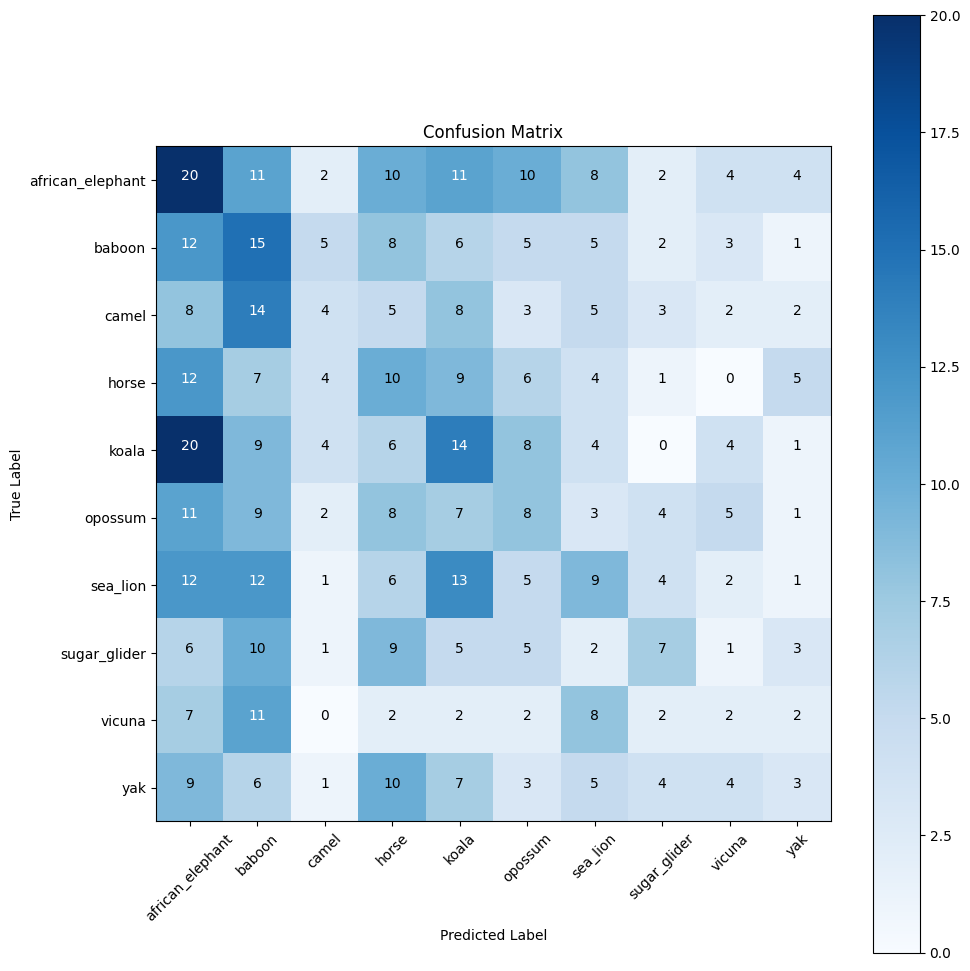

In [55]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

In [56]:
param_grid = {
    "n_neighbors": [3, 7, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2],
    "leaf_size": [10, 30],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "metric": ["euclidean", "manhattan"],
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_knn_model = grid_search.best_estimator_

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


In [57]:
y_pred = best_knn_model.predict(X_test)

In [58]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.18877551020408162


In [59]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.23      0.22      0.22        82
           1       0.21      0.24      0.22        62
           2       0.17      0.09      0.12        54
           3       0.14      0.16      0.15        58
           4       0.26      0.29      0.27        70
           5       0.16      0.17      0.17        58
           6       0.20      0.22      0.21        65
           7       0.21      0.16      0.18        49
           8       0.10      0.13      0.12        38
           9       0.15      0.13      0.14        52

    accuracy                           0.19       588
   macro avg       0.18      0.18      0.18       588
weighted avg       0.19      0.19      0.19       588



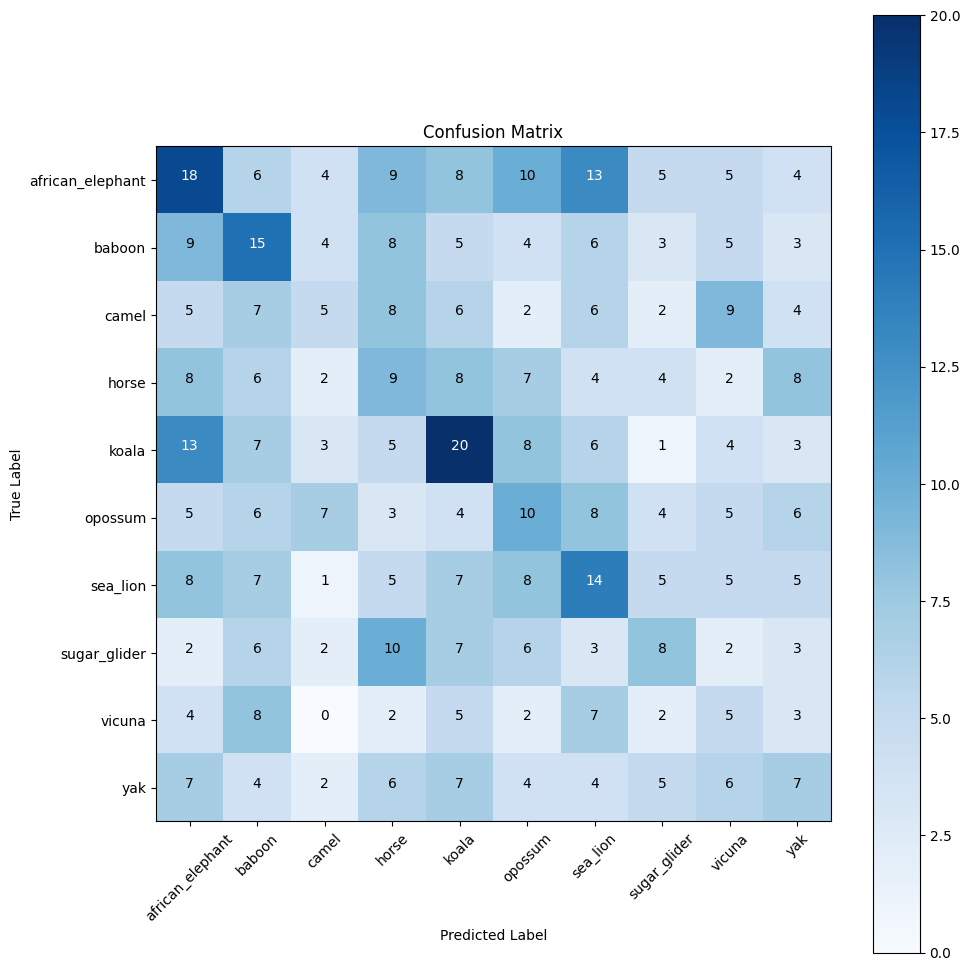

In [60]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()